# Supervised Learning

## **League of Legends Game Prediction**

![alt text](images/league_of_legends.jpeg)

### **Introduction**

The League of Legends Game Prediction is a project developed using different Supervised Learning algorithms with the intention to predict the outcome of a League of Legends match based on the first 15 minutes of a game, given by the dataset: *League of Legends SoloQ matches at 15 minutes 2024*.

#### **About Dataset**

This dataset contains data about the first 15 minutes of gameplay for over 24 thousand solo queue matches taken from european servers (EUNE and EUW).

Average ELO of the matches is between mid emerald to high diamond.

The main purpose of the dataset is to help train models for predicting the winner based on how the first 15 minutes of the match played out.

There are 14 features for red, and 14 features for the blue team (feature blueTeamFirstBlood counts for both teams since it tells us which team got the first kill), with the target feature being blueWin. blueWin == 1 indicates a victory of the blue team, and blueWin == 0 means that the red team won.

#### **Features**

- **matchId** - ID of the League match
- **blueTeamControlWardsPlaced/redTeamControlWardsPlaced** - control/pink wards placed by the blue/red team (can have outliers based on the possibility of the team giving up and buying a lot of wards at the end and placing them)
- **blueTeamWardsPlaced/redTeamWardsPlaced** - all types of wards (control wards, yellow trinkets, ghost poro trinkets etc..) placed by the blue/red team
- **blueTeamTotalKills/redTeamTotalKills** - total kills by the blue/red team, killing an enemy champion generates gold and experience
- **blueTeamDragonKills/redTeamDragonKills** - total dragon kills by the blue/red team, dragons are elite monsters that give specific permanent buffs when killed and killing the 4th dragon gives the team dragon's soul
- **blueTeamHeraldKills/redTeamHeraldKills** - total herald kills by the blue/red team, herald is a elite monster that helps in destroying the enemies buildings (turrets, inhibitors and the nexus) and pushing the lane
- **blueTeamTowersDestroyed/redTeamTowersDestroyed** - total towers destroyed by the blue/red team, towers are defensive structures in a lane that target minions and champions
- **blueTeamInhibitorsDestroyed/redTeamInhibitors** - total inhibitors destroyed by the blue/red team, inhibitor is a building protected by towers and when they are destroyed, they allow super minions to spawn on the side of the team that destroyed it
- **blueTeamTurretPlatesDestroyed/redTeamTurretPlatesDestroyed** - total turret/tower plates destroyed by the blue/red team, turret plates are protective shields on towers that generate gold when they are destroyed and the completely fall off at the 14 minutes
- **blueTeamFirstBlood/redTeamFirstBlood** - 1 blue team first blood, 0 red team first blood; first blood generates extra gold for the kill
- **blueTeamMinionsKilled/redTeamMinionsKilled** - total minions killed by the blue/red team, minions generate gold and experience and are of the main sources of income in the game
- **blueTeamJungleMinions/redTeamJungleMinions** - total jungle minions killed by the blue/red team, also generate gold, but the experience is gained only by the jungler
- **blueTeamTotalGold/redTeamTotalGold** - total gold earned by the blue/red team from various sources (buildings, kills, assists, minons,..)
- **blueTeamXp/redTeamXp** - total blue/red team experience, corelates to the total amount spent in lanes (a minion doesn't have to be killed by a champion to gain experience) and total amount of champions killed
- **blueTeamTotalDamageToChamps/redTeamTotalDamageToChamps** - total damage done by the blue/red team to enemy champions
- **blueWin** - 1 blue team win, 0 red team win

## Made By:

| Name | Email |
|-|-|
| João Guedes | up202108711@up.pt |
| João Sousa | up202106996@up.pt |
| Armando Martins | up201603566@up.pt |
|---|---|
| Group | T06 - G01 |

## **Algorithms**

The libraries used in this project are provided by Anaconda: Python, Anaconda, Jupyter Labs, NumPy, SciPy, Pandas, Scikit-Learn, MatPlotLib
and Seaborn.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:

df = pd.read_csv('data/match_data_v5.csv')
df.drop(df.columns[-1], axis=1, inplace=True)

# remove duplicated matchId games
df = df.drop_duplicates(subset='matchId')
# remove (') char from matchId
df['matchId'] = df['matchId'].str.replace("'", "")

df.head()

matchId  blueTeamControlWardsPlaced  blueTeamWardsPlaced  \
0  EUW1_6882489515                           2                   23   
1  EUW1_6882416210                           2                   46   
2  EUW1_6881092720                           2                   19   
3  EUW1_6879405717                           3                   28   
4  EUW1_6879389461                           3                   30   

   blueTeamTotalKills  blueTeamDragonKills  blueTeamHeraldKills  \
0                   4                    2                    0   
1                  12                    1                    0   
2                  13                    0                    0   
3                   8                    0                    1   
4                  11                    1                    1   

   blueTeamTowersDestroyed  blueTeamInhibitorsDestroyed  \
0                        0                            0   
1                        1                            0   
2                        0                            0   
3                        1                            0   
4                        1                            0   

   blueTeamTurretPlatesDestroyed  blueTeamFirstBlood  ...  redTeamHeraldKills  \
0                              7                   0  ...                   0   
1                             10                   0  ...                   0   
2                             11                   0  ...                   0   
3                              9                   1  ...                   0   
4                              7                   0  ...                   0   

   redTeamTowersDestroyed  redTeamInhibitorsDestroyed  \
0                       2                           0   
1                       1                           0   
2                       2                           0   
3                       0                           0   
4                       1                           0   

   redTeamTurretPlatesDestroyed  redTeamMinionsKilled  redTeamJungleMinions  \
0                             1                   400                    94   
1                             4                   373                    76   
2                             3                   340                    84   
3                             5                   378                    87   
4                             5                   382                    96   

   redTeamTotalGold  redTeamXp  redTeamTotalDamageToChamps  blueWin  
0             29637      32613                       27239        1  
1             28970      30320                       36585        0  
2             30510      29464                       42984        0  
3             25157      31069                       28229        0  
4             26052      29475                       19245        1  

[5 rows x 29 columns]

In [4]:
df.describe()

blueTeamControlWardsPlaced  blueTeamWardsPlaced  blueTeamTotalKills  \
count                24218.000000         24218.000000        24218.000000   
mean                     3.610414            41.364316           12.790941   
std                      2.018264            43.477286            4.909179   
min                      0.000000             9.000000            0.000000   
25%                      2.000000            25.000000            9.000000   
50%                      3.000000            29.000000           12.000000   
75%                      5.000000            35.000000           16.000000   
max                     37.000000           603.000000           38.000000   

       blueTeamDragonKills  blueTeamHeraldKills  blueTeamTowersDestroyed  \
count         24218.000000         24218.000000             24218.000000   
mean              0.737881             0.123627                 0.654802   
std               0.722118             0.329288                 0.885765   
min               0.000000             0.000000                 0.000000   
25%               0.000000             0.000000                 0.000000   
50%               1.000000             0.000000                 0.000000   
75%               1.000000             0.000000                 1.000000   
max               2.000000             2.000000                10.000000   

       blueTeamInhibitorsDestroyed  blueTeamTurretPlatesDestroyed  \
count                 24218.000000                   24218.000000   
mean                      0.002023                       8.915270   
std                       0.054109                       3.083979   
min                       0.000000                       0.000000   
25%                       0.000000                       7.000000   
50%                       0.000000                       9.000000   
75%                       0.000000                      11.000000   
max                       2.000000                      22.000000   

       blueTeamFirstBlood  blueTeamMinionsKilled  ...  redTeamHeraldKills  \
count        24218.000000           24218.000000  ...        24218.000000   
mean             0.503923             349.241886  ...            0.103146   
std              0.499995              31.343136  ...            0.304156   
min              0.000000             194.000000  ...            0.000000   
25%              0.000000             329.000000  ...            0.000000   
50%              1.000000             350.000000  ...            0.000000   
75%              1.000000             371.000000  ...            0.000000   
max              1.000000             465.000000  ...            1.000000   

       redTeamTowersDestroyed  redTeamInhibitorsDestroyed  \
count            24218.000000                24218.000000   
mean                 0.955075                    0.001528   
std                  0.981834                    0.044028   
min                  0.000000                    0.000000   
25%                  0.000000                    0.000000   
50%                  1.000000                    0.000000   
75%                  1.000000                    0.000000   
max                 10.000000                    2.000000   

       redTeamTurretPlatesDestroyed  redTeamMinionsKilled  \
count                  24218.000000          24218.000000   
mean                       3.883640            350.290363   
std                        2.590925             31.595285   
min                        0.000000            188.000000   
25%                        2.000000            330.000000   
50%                        4.000000            351.000000   
75%                        5.000000            372.000000   
max                       15.000000            464.000000   

       redTeamJungleMinions  redTeamTotalGold     redTeamXp  \
count          24218.000000       24218.00000  24218.000000   
mean              88.547444       27787.86605  29618.844578   
std           

In [5]:
df.isna().any()

matchId                          False
blueTeamControlWardsPlaced       False
blueTeamWardsPlaced              False
blueTeamTotalKills               False
blueTeamDragonKills              False
blueTeamHeraldKills              False
blueTeamTowersDestroyed          False
blueTeamInhibitorsDestroyed      False
blueTeamTurretPlatesDestroyed    False
blueTeamFirstBlood               False
blueTeamMinionsKilled            False
blueTeamJungleMinions            False
blueTeamTotalGold                False
blueTeamXp                       False
blueTeamTotalDamageToChamps      False
redTeamControlWardsPlaced        False
redTeamWardsPlaced               False
redTeamTotalKills                False
redTeamDragonKills               False
redTeamHeraldKills               False
redTeamTowersDestroyed           False
redTeamInhibitorsDestroyed       False
redTeamTurretPlatesDestroyed     False
redTeamMinionsKilled             False
redTeamJungleMinions             False
redTeamTotalGold         

Lets see if the win distribuition is well done, 

In [6]:
blue_win_count = df[df["blueWin"] == 1].count()["blueWin"]
red_win_count = df[df["blueWin"] == 0].count()["blueWin"]

print(f'Blue team won {blue_win_count} games')
print(f'Red team won {red_win_count} games')
print(f'Diference between  {blue_win_count - red_win_count} games')

Blue team won 11977 games
Red team won 12241 games
Diference between  -264 games


All the data we have is referent to each one of the teams, for example, we have "redTeamTotalKills" and "bueTeamTotalKills", but the real value that matter for that game is the difference between those two value, of each team. This was we can reduce our data to half the values, and keep data integrety!


NOTE: We notice a data problem on turrent plates! Basicly the module itself of feature importance was correct, but the fact that it was negative was not... In the "Correlation Matrix Heatmap" we also notice that all values were negative, even the relation between TurrentPlates-TurrentDestroid... This didn't make any sense! 

On day 14/05/2024 a new comment on Kaggle was added and it was confirmed that the TurrentPlate blue and red were switch! So we just need to invert the signal of the value, and everything is good to go!!


In [7]:
df['redTeamTurretPlatesDestroyed'] = -df['redTeamTurretPlatesDestroyed']
df['blueTeamTurretPlatesDestroyed'] = -df['blueTeamTurretPlatesDestroyed']

In [8]:
df_v1 = df.copy()

blue_columns = [col for col in df_v1.columns if col.startswith('blue') and not col.startswith('blueTeamFirstBlood')][:-1]
red_columns = [col for col in df_v1.columns if col.startswith('red')]

for (blue_col, red_col) in zip(blue_columns,red_columns):
    df_v1[f'{blue_col}_diff'] = df_v1[blue_col] - df_v1[red_col]

df_v1.drop(columns=blue_columns + red_columns, inplace=True)



In [9]:
blueWin_index = df_v1.columns.get_loc('blueWin')

# Move 'blueWin' column to the last position
cols = list(df_v1.columns)
cols.append(cols.pop(blueWin_index))
df_v1 = df_v1[cols]

NOTE:

We will also create a league_data_cleanedv2.csv, where we dont use the diference between drakes kill, but how many drake each team has, because this two cases are differente:

blueTeamDragonKills = 2 and redTeamDragonKills = 1;
vs
blueTeamDragonKills = 1 and redTeamDragonKills = 0;

The first drake gives one certain power to the team, second another, and so on

In [10]:
df_v2 = df.copy()
blue_columns_v2 = [col for col in df_v2.columns if col.startswith('blue') and not col.startswith('blueTeamDragonKills') and not col.startswith('blueTeamFirstBlood')][:-1]
red_columns_v2 = [col for col in df_v2.columns if col.startswith('red') and not col.startswith('redTeamDragonKills') and not col.startswith('redTeamFirstBlood')]

print(f'blue cols: {blue_columns_v2}')
print(f'red cols: {red_columns_v2}')

for (blue_col, red_col) in zip(blue_columns_v2,red_columns_v2):    
    df_v2[f'{blue_col}_diff'] = df_v2[blue_col] - df_v2[red_col]

df_v2.drop(columns=blue_columns_v2 + red_columns_v2, inplace=True)

# drop redTeamFirstBlood column of df_v2

blueWin_index = df_v2.columns.get_loc('blueWin')

# Move 'blueWin' column to the last position
cols = list(df_v2.columns)
cols.append(cols.pop(blueWin_index))
df_v2 = df_v2[cols]


print(df_v2)


blue cols: ['blueTeamControlWardsPlaced', 'blueTeamWardsPlaced', 'blueTeamTotalKills', 'blueTeamHeraldKills', 'blueTeamTowersDestroyed', 'blueTeamInhibitorsDestroyed', 'blueTeamTurretPlatesDestroyed', 'blueTeamMinionsKilled', 'blueTeamJungleMinions', 'blueTeamTotalGold', 'blueTeamXp', 'blueTeamTotalDamageToChamps']
red cols: ['redTeamControlWardsPlaced', 'redTeamWardsPlaced', 'redTeamTotalKills', 'redTeamHeraldKills', 'redTeamTowersDestroyed', 'redTeamInhibitorsDestroyed', 'redTeamTurretPlatesDestroyed', 'redTeamMinionsKilled', 'redTeamJungleMinions', 'redTeamTotalGold', 'redTeamXp', 'redTeamTotalDamageToChamps']
               matchId  blueTeamDragonKills  blueTeamFirstBlood  \
0      EUW1_6882489515                    2                   0   
1      EUW1_6882416210                    1                   0   
2      EUW1_6881092720                    0                   0   
3      EUW1_6879405717                    0                   1   
4      EUW1_6879389461                    1 

Now the data is cleaned, we will save it in a csv file

In [11]:
df_v1.to_csv('data/league_data_cleaned.csv', index=False)
df_v2.to_csv('data/league_data_cleaned_v2.csv', index=False)

league_data_cleaned = pd.read_csv('data/league_data_cleaned_v2.csv')

Lets see if the game win distribution is well done, or if we need asserts

In [12]:
blue_win_count = league_data_cleaned[league_data_cleaned["blueWin"] == 1].count()["blueWin"]
red_win_count = league_data_cleaned[league_data_cleaned["blueWin"] == 0].count()["blueWin"]

print(f'Blue team won {blue_win_count} games')
print(f'Red team won {red_win_count} games')
print(f'Diference between blue and red wins: {blue_win_count - red_win_count} games')

Blue team won 11977 games
Red team won 12241 games
Diference between blue and red wins: -264 games


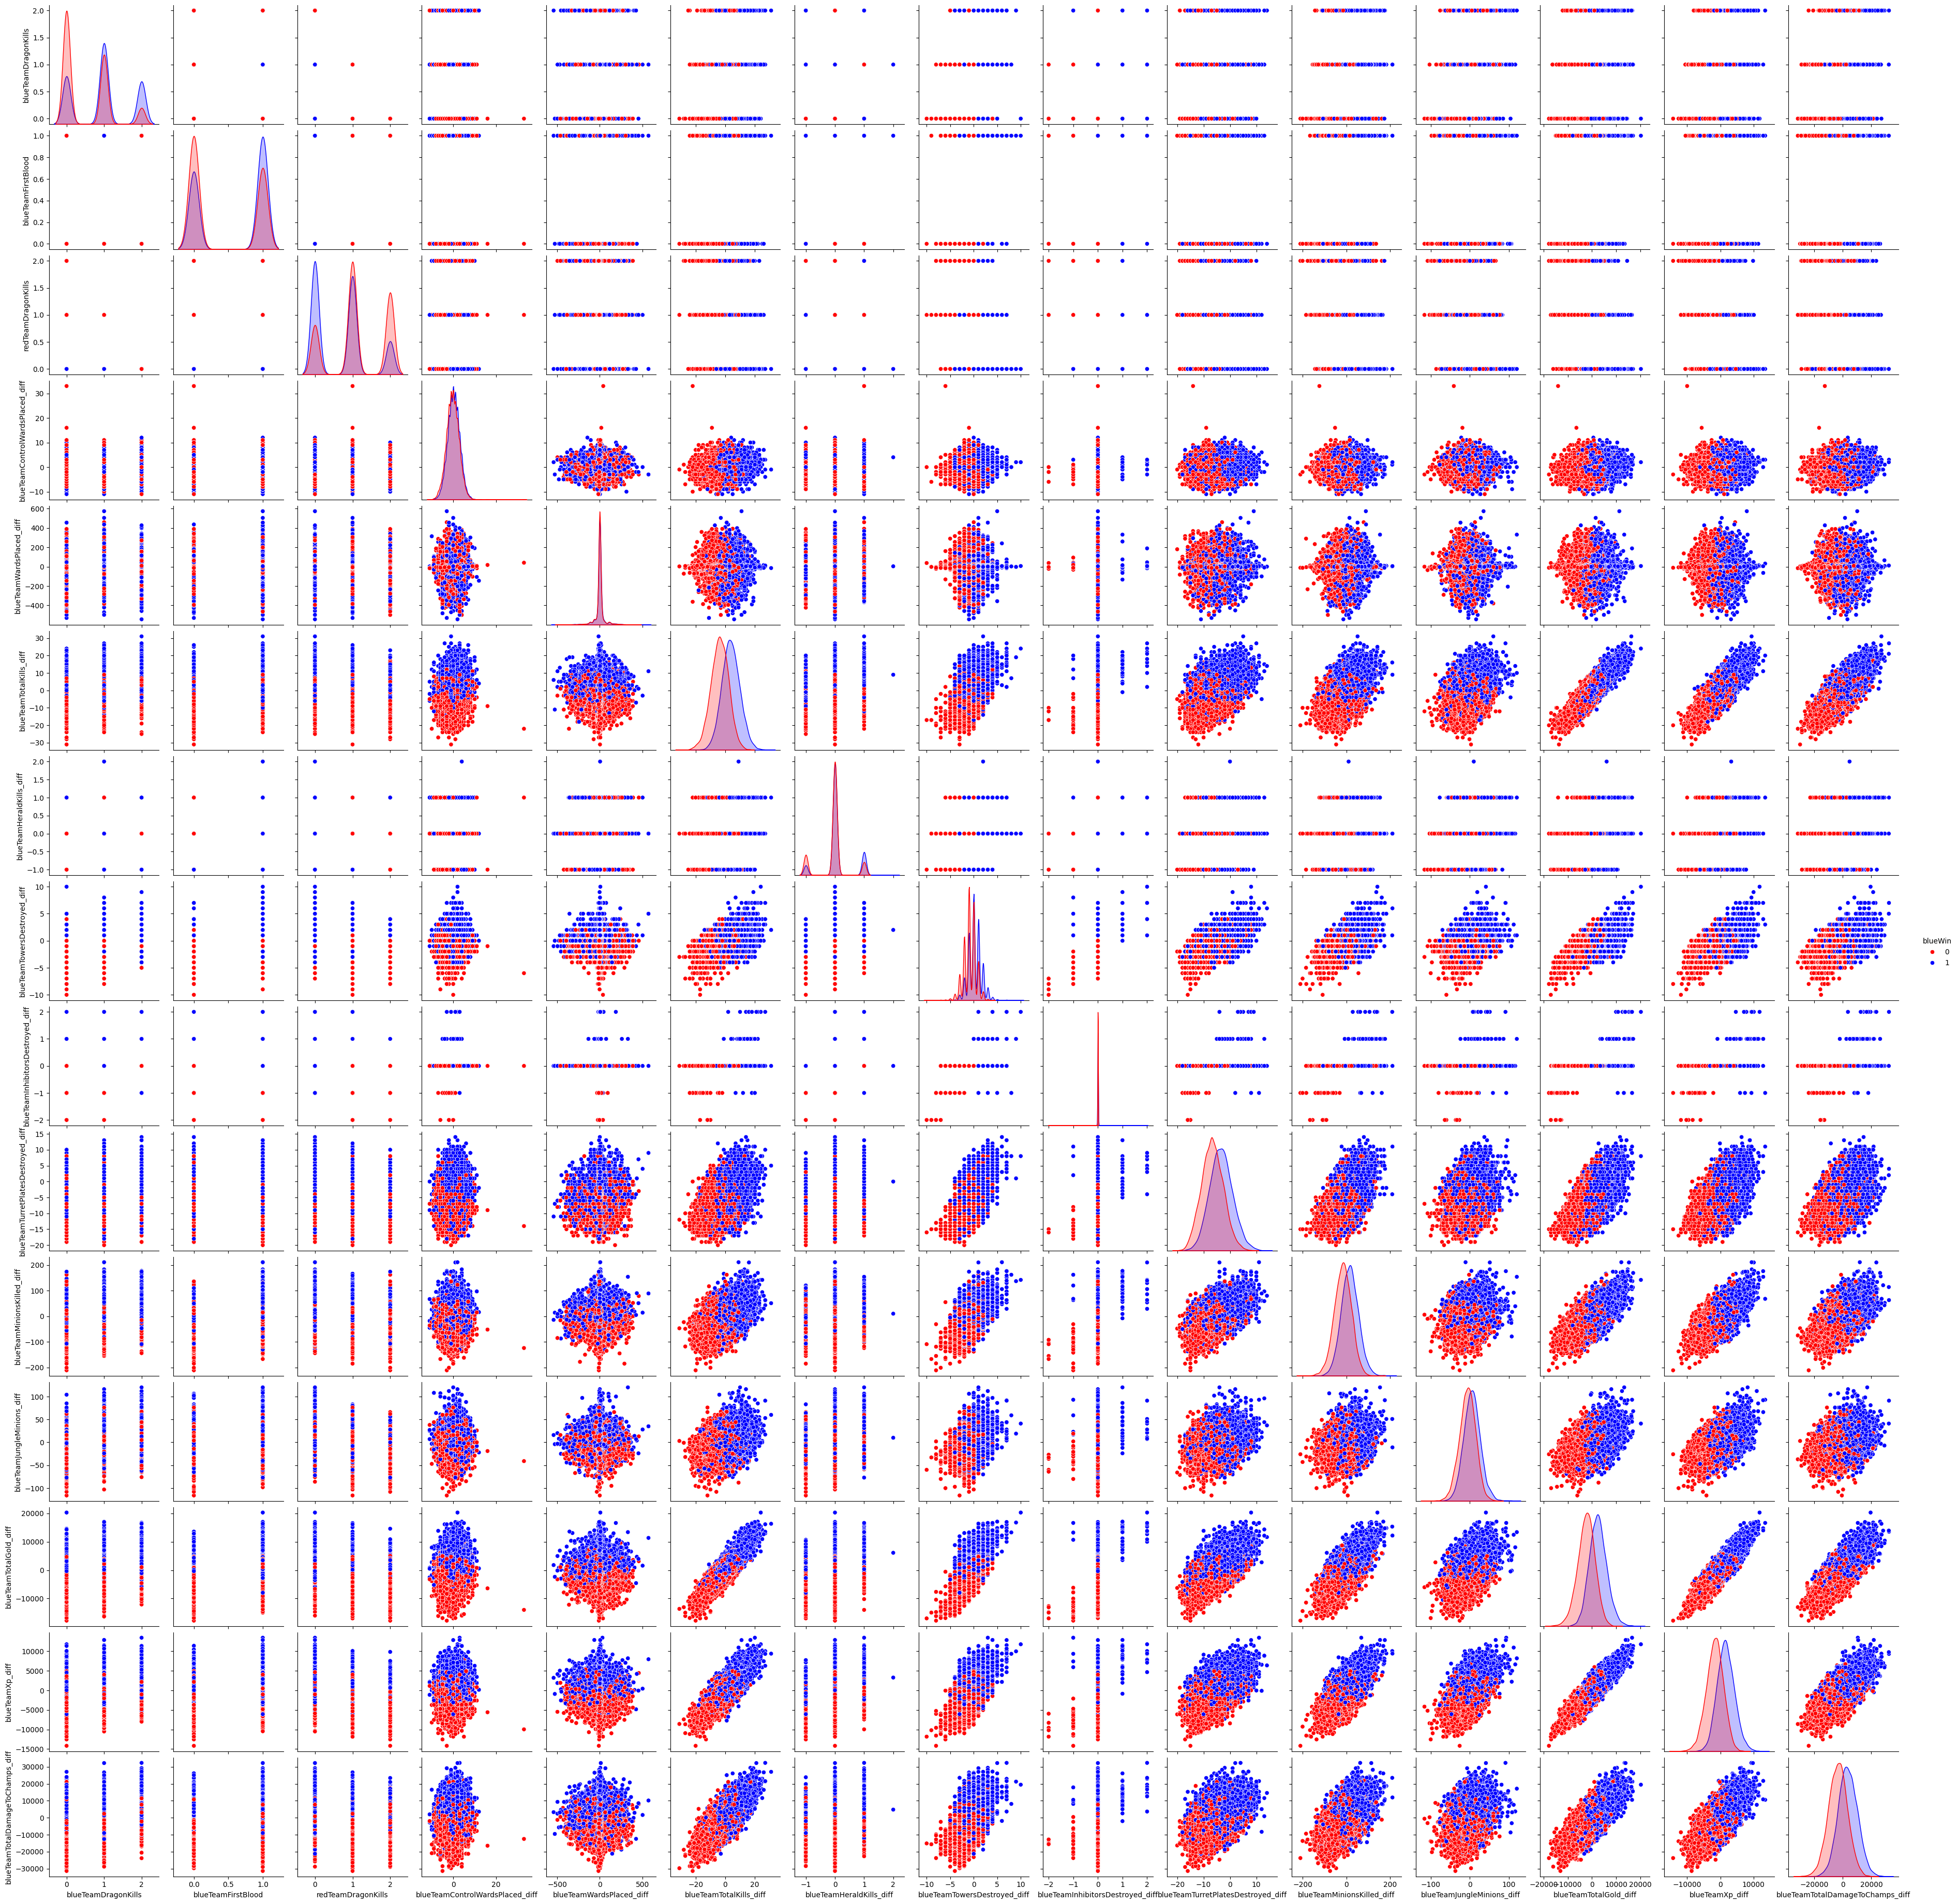

In [13]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

pallete_lol= {0: 'red', 1: 'blue'}

sb.pairplot(league_data_cleaned, hue='blueWin', palette=pallete_lol)

<Axes: >

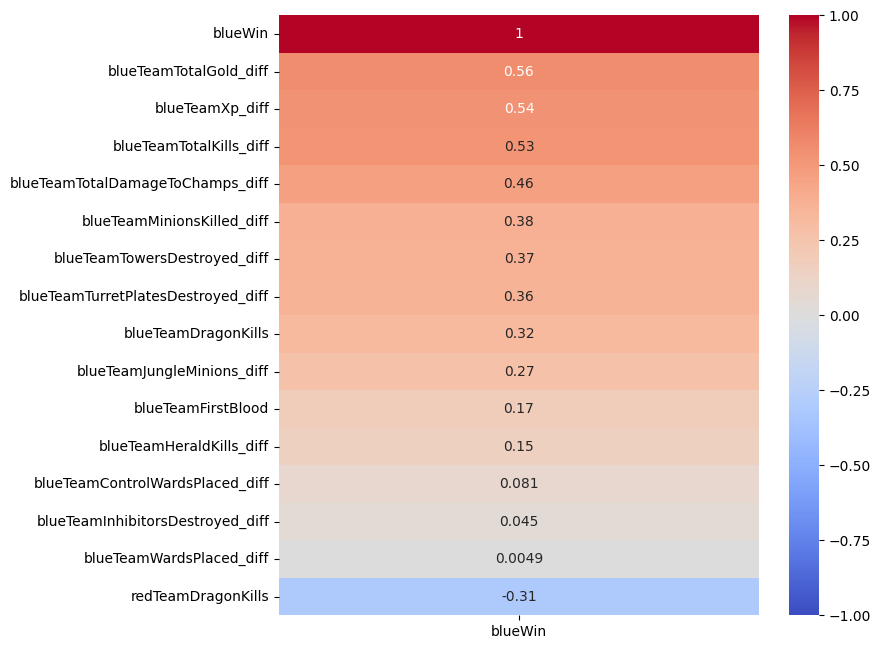

In [14]:
league_data_cleaned1 = league_data_cleaned.copy()

league_data_cleaned1.drop(columns=['matchId'], inplace=True)

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, wspace=0.3, hspace=0.3)

corr = league_data_cleaned1.corr()[['blueWin']].sort_values(by='blueWin' ,ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

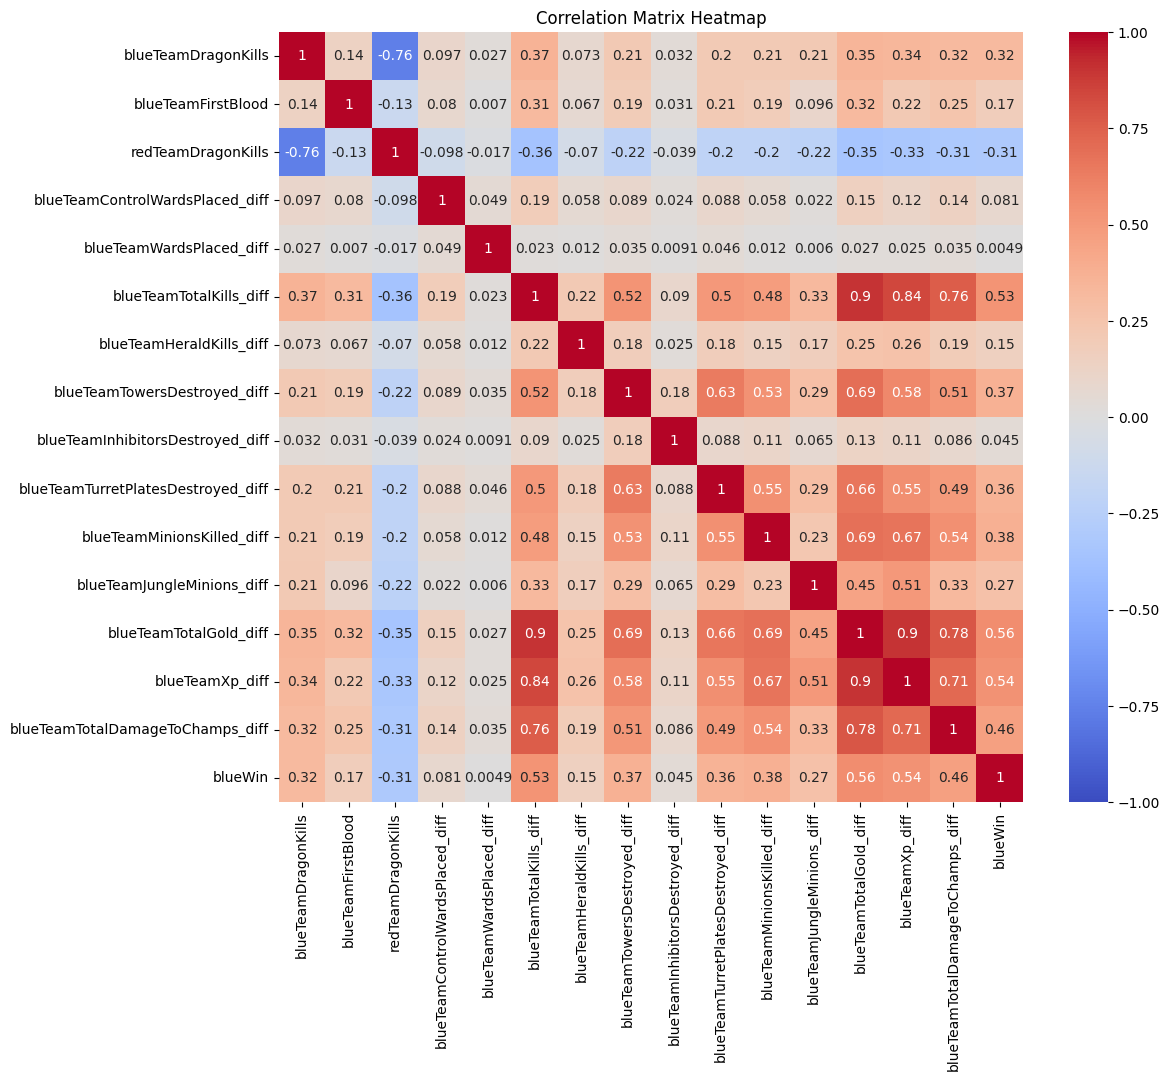

In [15]:
# creating a correlation matrix
corr_matrix = league_data_cleaned1.corr()

# plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()